**<h1 style="text-align: center;">[Your Project Title]</h1>**

**<h3 style="text-align: center;">[Your Name]</h3>**

---

## **Section 1. Business Understanding**

### **1.1 Context**

The dataset contains customer information from a telecom company including demographics, services subscribed, account information, and churn status. The business context is to predict customer churn to enable targeted retention strategies.

### **1.2 Problem Statements**

- Which customers are likely to churn?
- What factors influence customer churn the most?
- How can the company reduce churn and improve customer retention?

### **1.3 Goals**

- Develop a predictive model to classify customers as churn or no churn.
- Identify key features affecting churn.
- Provide actionable insights for business to reduce churn.

### **1.4 Analytical Approach**

- Use supervised machine learning classification techniques.
- Data preprocessing including cleaning, feature engineering.
- Model development with benchmarking, tuning, and evaluation.
- Model explanation using feature importance and SHAP values.

### **1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- Business Metric: Reduction in churn rate.
- Machine Learning Evaluation Metric: Accuracy, Precision, Recall, F1-score, ROC-AUC.

### **1.6 Success Criteria**

- Achieve high classification performance (e.g., ROC-AUC > 0.80).
- Provide interpretable insights for business decisions.
- Demonstrate model effectiveness on unseen data.

## **Section 2. Data Understanding**

### **2.1 General Information**

- Dataset contains customer records with attributes related to demographics, services, contracts, billing, and churn.
- Target variable: Churn (Yes/No).

In [57]:
import pandas as pd
pd.set_option('display.max_columns', None)

real_df = pd.read_csv(r'C:\Users\User\Documents\Purwadhika\JCDS 2602\Capstone Project\telco-churn\data\raw\data.csv')
df = real_df.copy()

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### **2.2 Feature Information**

| Feature            | Description                                      | Impact to Business                                         |
|--------------------|------------------------------------------------|------------------------------------------------------------|
| customerID         | Unique customer identifier                       | Identification, no direct impact                            |
| gender             | Customer gender (Male, Female)                   | Possible demographic influence                              |
| SeniorCitizen      | Whether the customer is a senior citizen (0,1)  | May affect churn due to different needs                    |
| Partner            | Whether customer has a partner (Yes, No)        | Social factors influencing churn                            |
| Dependents         | Whether customer has dependents (Yes, No)       | Social factors influencing churn                            |
| tenure             | Number of months customer has stayed             | Longer tenure usually means lower churn                     |
| PhoneService       | Whether customer has phone service (Yes, No)    | Service usage influence                                     |
| MultipleLines      | Whether customer has multiple lines (Yes, No, No phone service) | Service usage influence                                     |
| InternetService    | Type of internet service (DSL, Fiber optic, No) | Service type impact on churn                                |
| OnlineSecurity     | Whether customer has online security (Yes, No, No internet service) | Service feature impact                                      |
| OnlineBackup       | Whether customer has online backup (Yes, No, No internet service) | Service feature impact                                      |
| DeviceProtection   | Whether customer has device protection (Yes, No, No internet service) | Service feature impact                                      |
| TechSupport        | Whether customer has tech support (Yes, No, No internet service) | Service feature impact                                      |
| StreamingTV        | Whether customer streams TV (Yes, No, No internet service) | Service feature impact                                      |
| StreamingMovies    | Whether customer streams movies (Yes, No, No internet service) | Service feature impact                                      |
| Contract           | Contract type (Month-to-month, One year, Two year) | Contract length impact on churn                             |
| PaperlessBilling   | Whether customer uses paperless billing (Yes, No) | Billing preference impact                                   |
| PaymentMethod      | Payment method used                               | Billing method impact                                       |
| MonthlyCharges     | Monthly charges                                  | Financial factor influencing churn                          |
| TotalCharges       | Total charges to date                            | Financial factor influencing churn                          |
| Churn              | Whether customer churned (Yes, No)              | Target variable                                            |

### **2.3 Missing Values Checking**

Lorem ipsum

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


<Axes: >

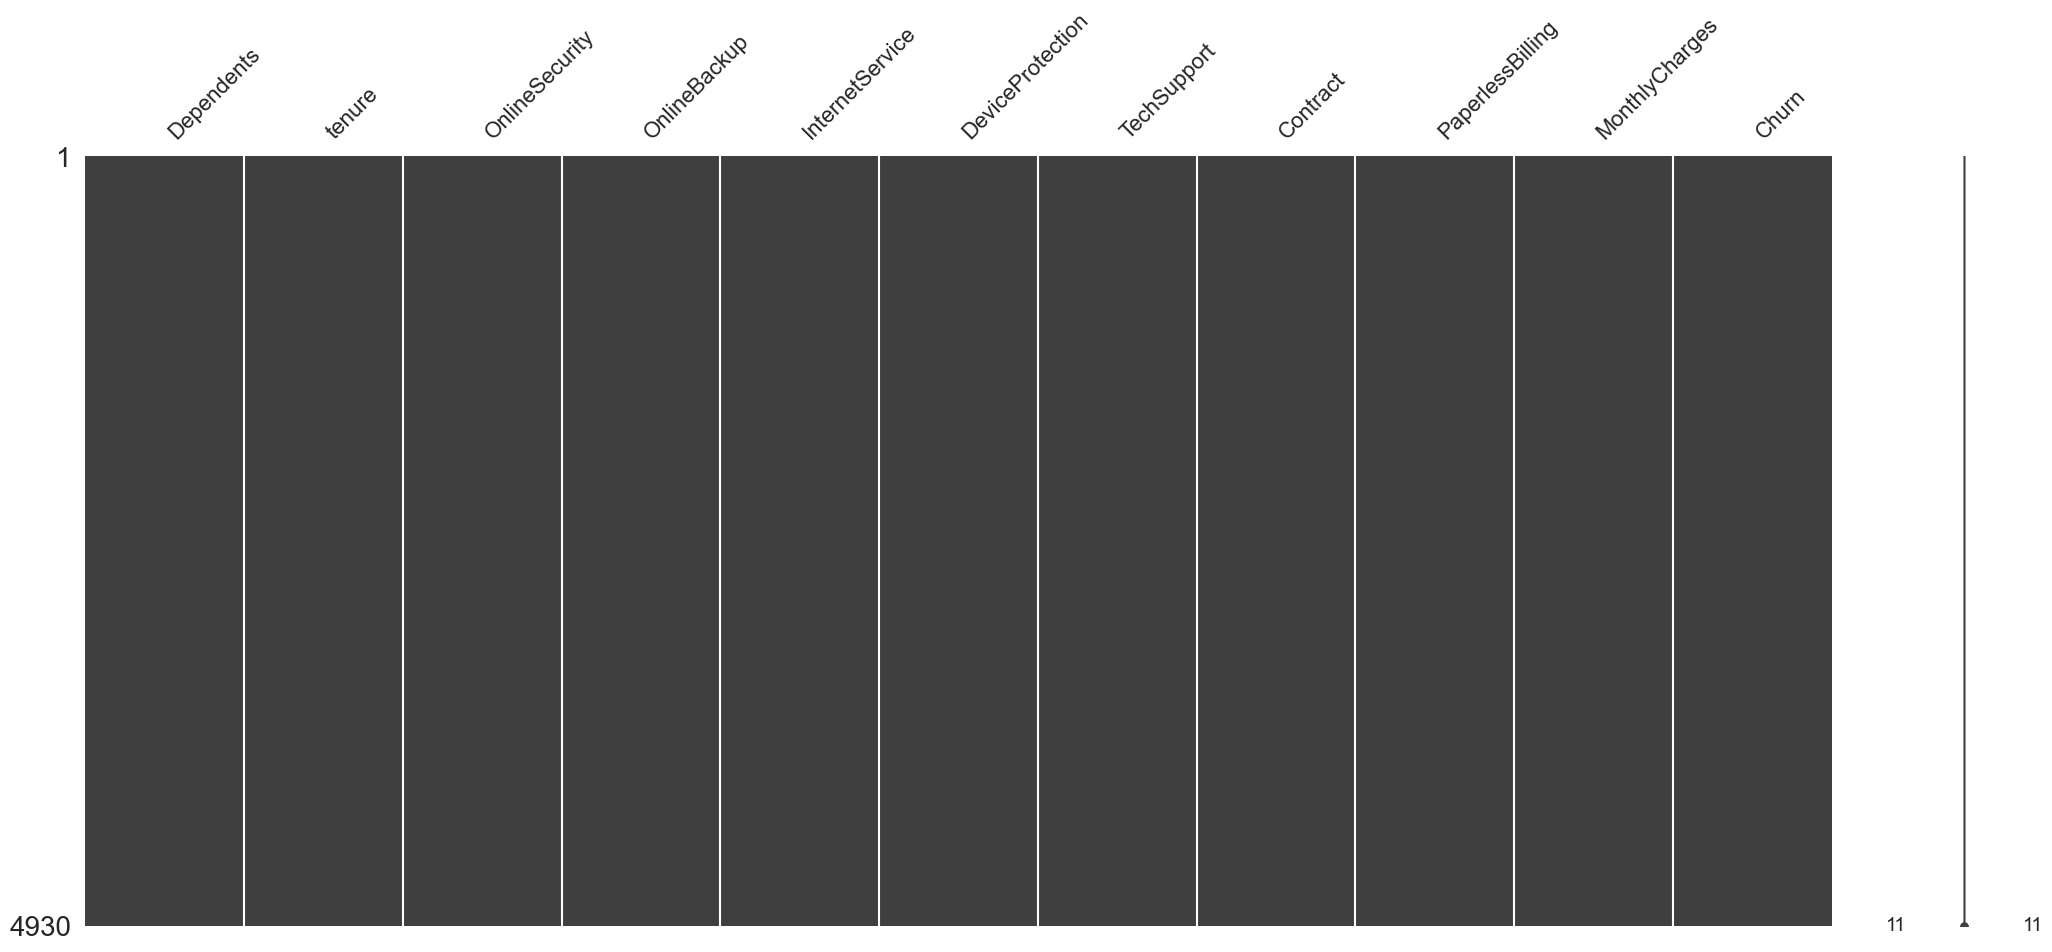

In [58]:
import missingno as msno

print(df.isnull().sum())
msno.matrix(df)

In [59]:
# isnull_df = df[df['TotalCharges'].isnull()]
# print(isnull_df.shape[0])
# display(isnull_df.head())

### **2.4 Duplicated Values Checking**

- Check for duplicated customerID or rows; no explicit duplicates noted.

In [60]:
df.duplicated().sum()

77

### **2.5 Dataset Restructuring for Better EDA**

In [61]:
# df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

categories = [col for col in df.select_dtypes(include=['object']).columns if col != 'customerID']
df[categories] = df[categories].astype('category')

# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Dependents        4930 non-null   category
 1   tenure            4930 non-null   int64   
 2   OnlineSecurity    4930 non-null   category
 3   OnlineBackup      4930 non-null   category
 4   InternetService   4930 non-null   category
 5   DeviceProtection  4930 non-null   category
 6   TechSupport       4930 non-null   category
 7   Contract          4930 non-null   category
 8   PaperlessBilling  4930 non-null   category
 9   MonthlyCharges    4930 non-null   float64 
 10  Churn             4930 non-null   category
dtypes: category(9), float64(1), int64(1)
memory usage: 121.6 KB


### **2.6 Exploratory Data Analysis (EDA)**

#### **2.6.1 Outlier Analysis**

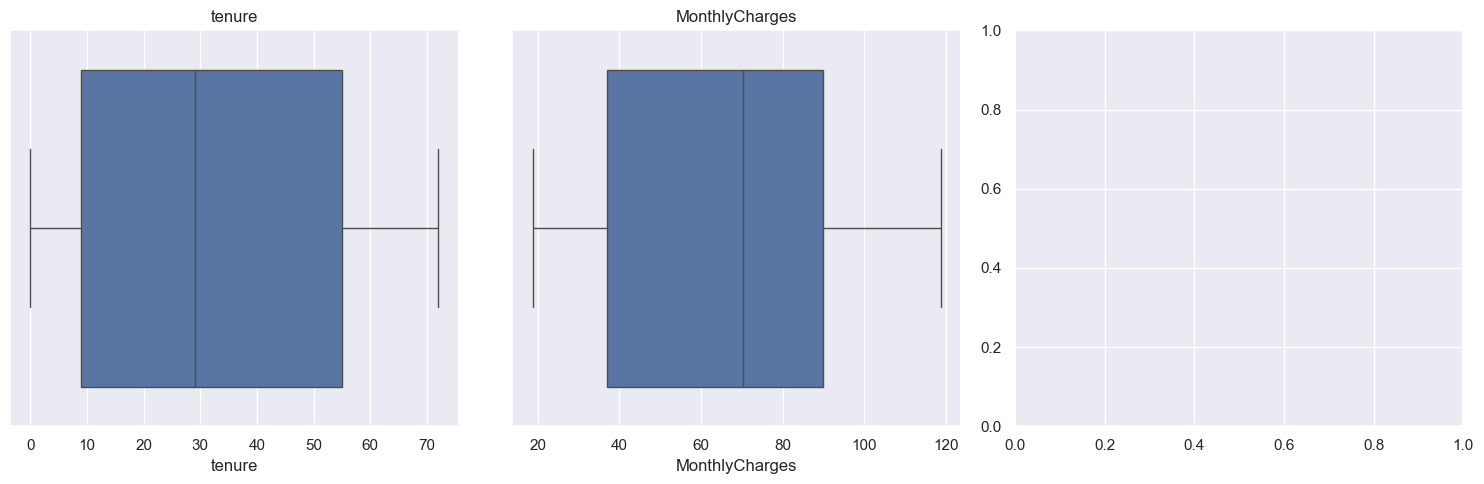

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

numerics = df.select_dtypes(include=['float64','int64']).columns.tolist()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerics):
    sns.boxplot(x=df[col], orient='h', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### **2.6.2 Unique Values Analysis**

In [63]:
columns = df.select_dtypes(include=['category']).columns
unique = dict()
nunique = dict()
for col in columns:
    unique[col] = df[col].nunique()

for col in columns: 
    nunique[col] = df[col].unique().tolist()

unique_df = pd.DataFrame({'unique':unique, 'nunique':nunique})
unique_df

,unique,nunique
Dependents,2,"[Yes, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[No, Yes, No internet service]"
InternetService,3,"[DSL, Fiber optic, No]"
DeviceProtection,3,"[Yes, No internet service, No]"
TechSupport,3,"[Yes, No, No internet service]"
Contract,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,2,"[Yes, No]"
Churn,2,"[Yes, No]"


#### **2.6.3 Proportion Analysis**

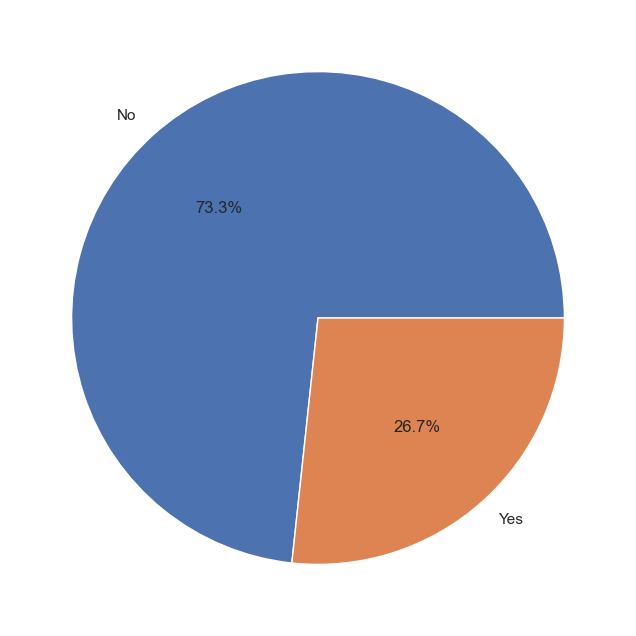

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

churn_propo = df['Churn'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(churn_propo, labels=churn_propo.index, autopct='%1.1f%%');

#### **2.6.4 Feature Distribution Analysis**

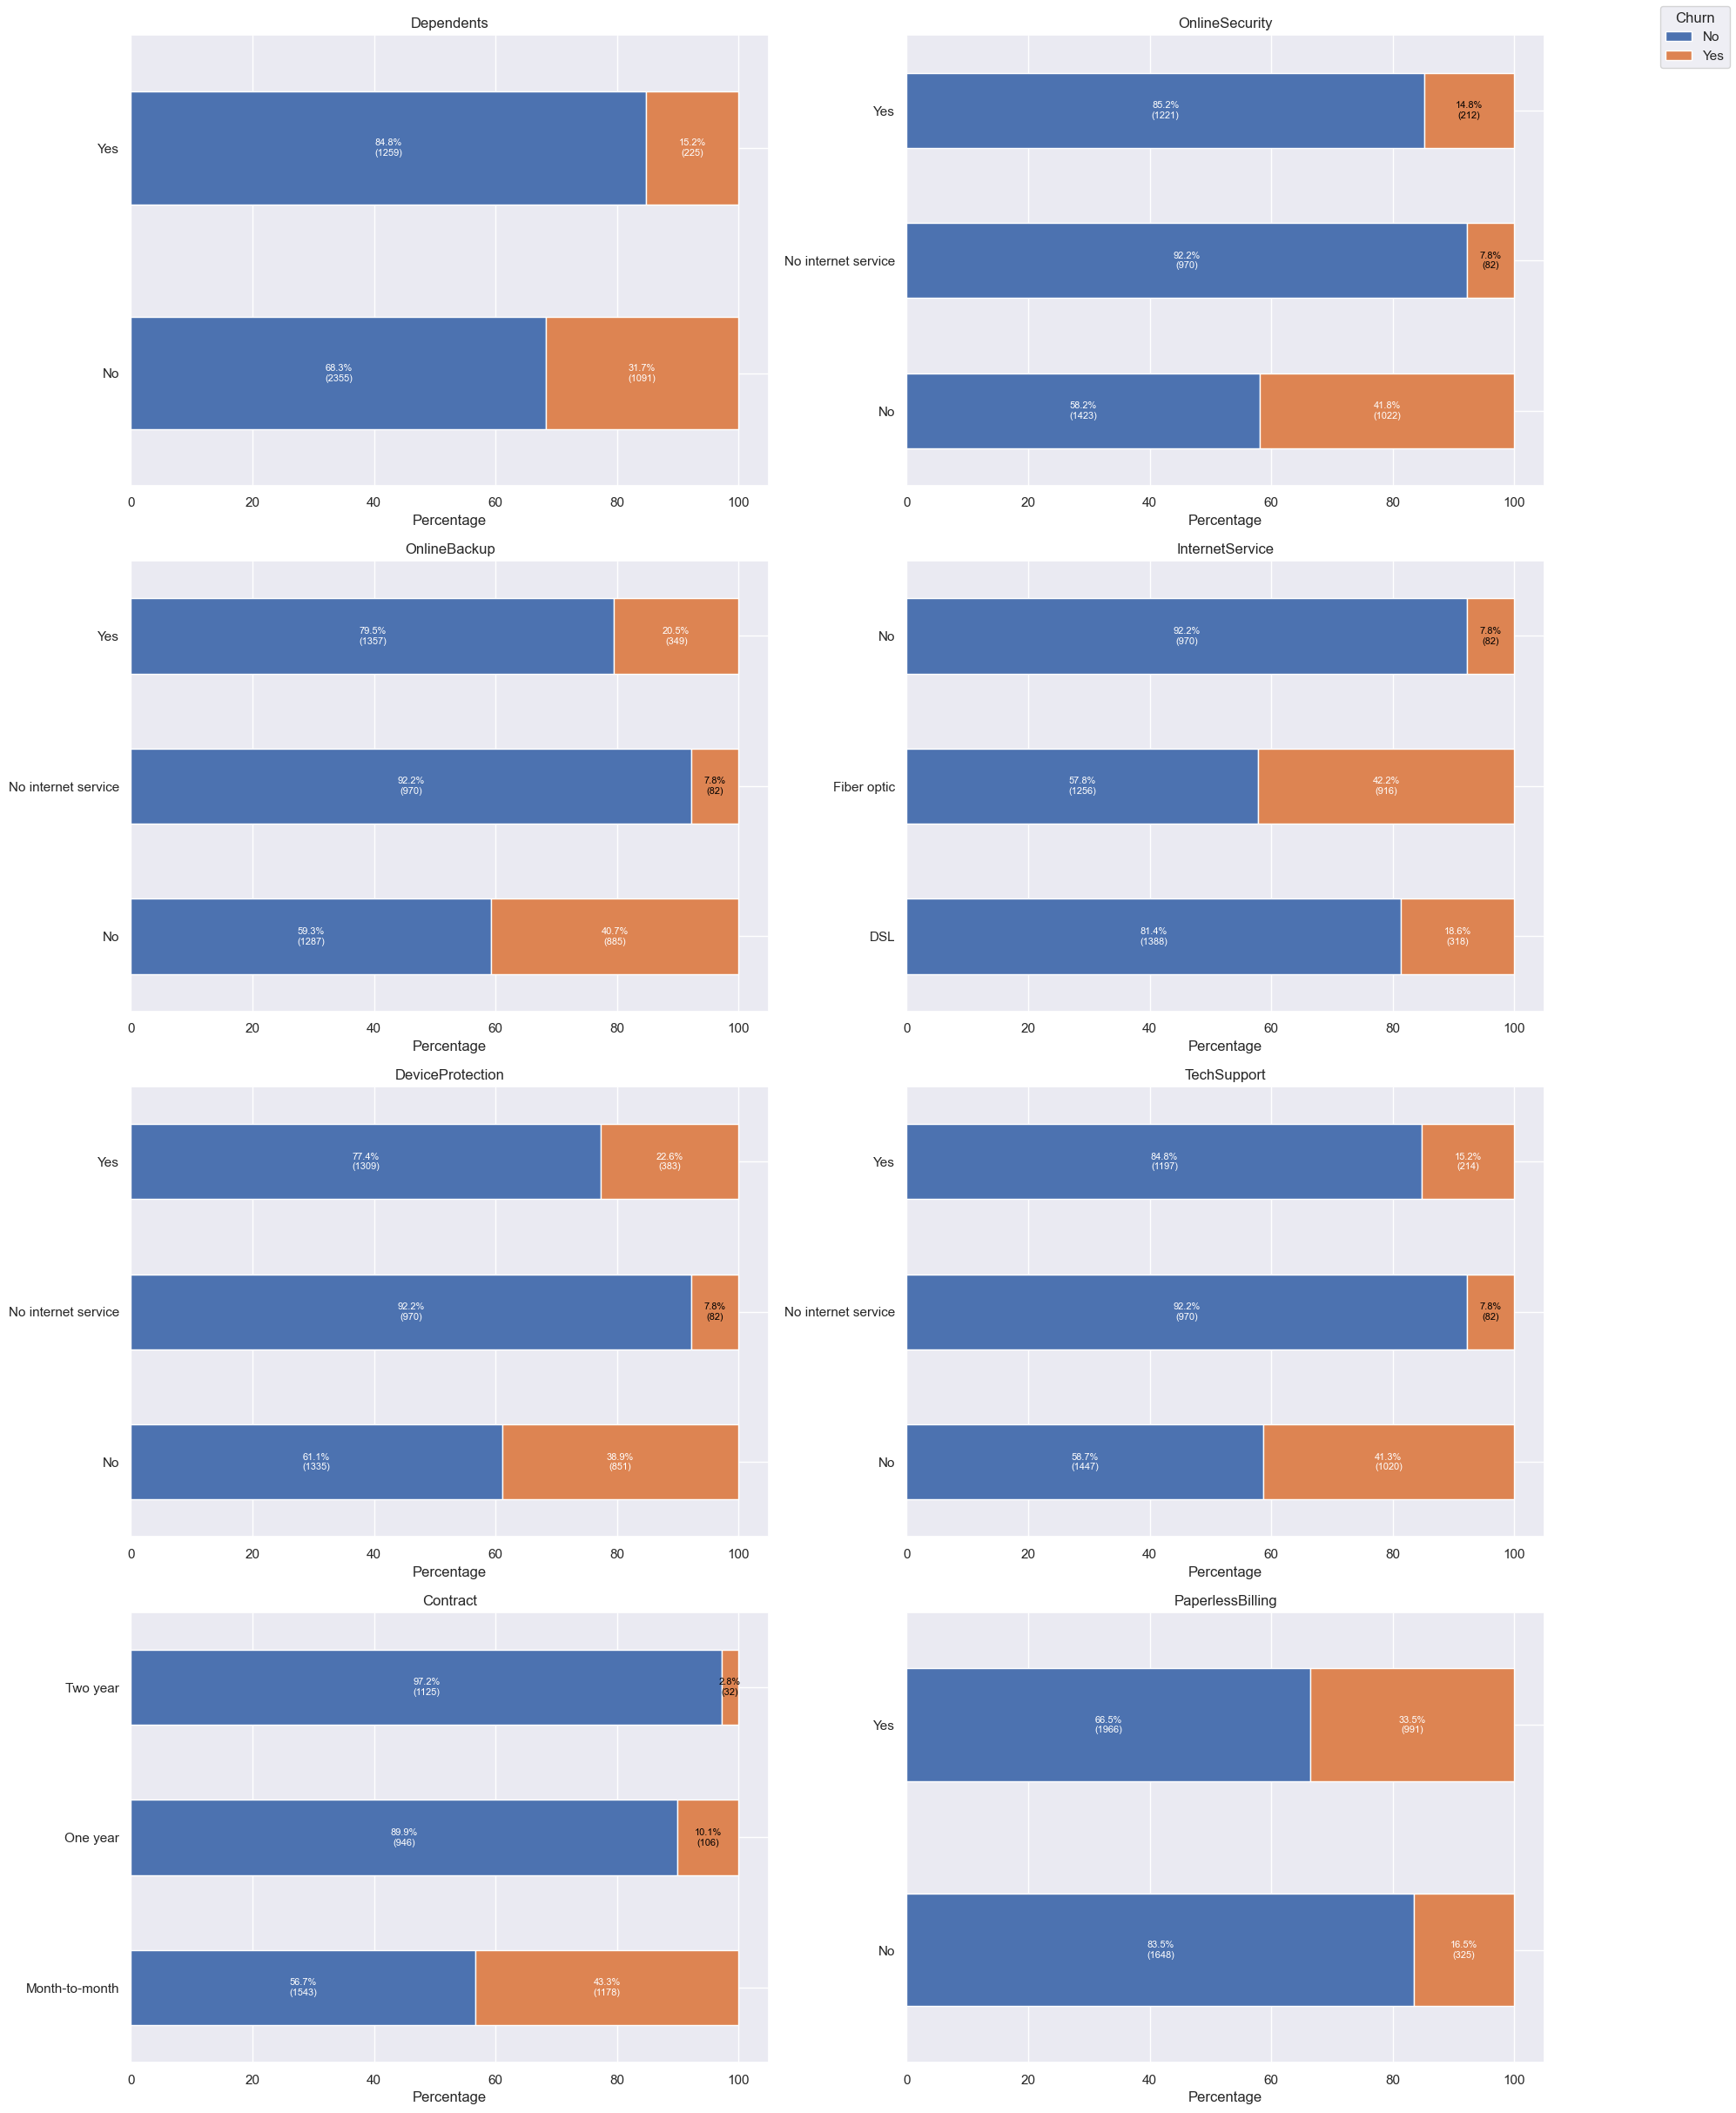

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

categorical_cols = df.select_dtypes(include='category').columns.drop('Churn')

num_plots = len(categorical_cols)
cols = 2
rows = 8

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Compute counts per category and churn status with observed=True
    counts = df.groupby([col, 'Churn'], observed=True).size().unstack(fill_value=0)

    # Convert counts to percentages per category level (row-wise)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot horizontal stacked bar chart on the subplot axis
    percentages.plot(kind='barh', stacked=True, ax=ax, legend=False)

    ax.set_title(f'{col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')

    # Annotate each segment with percentage and count
    for j, (index, row) in enumerate(percentages.iterrows()):
        cum_width = 0
        for churn_status in percentages.columns:
            pct = row[churn_status]
            cnt = counts.loc[index, churn_status]
            if pct > 0:
                label = f'{pct:.1f}%\n({cnt})'
                ax.text(cum_width + pct / 2, j, label, ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
                cum_width += pct

# Remove any unused subplots
for k in range(i + 1, len(axes)):
    fig.delaxes(axes[k])

# Create one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on right for legend
plt.show()


#### **2.6.5 Correlation Analysis**

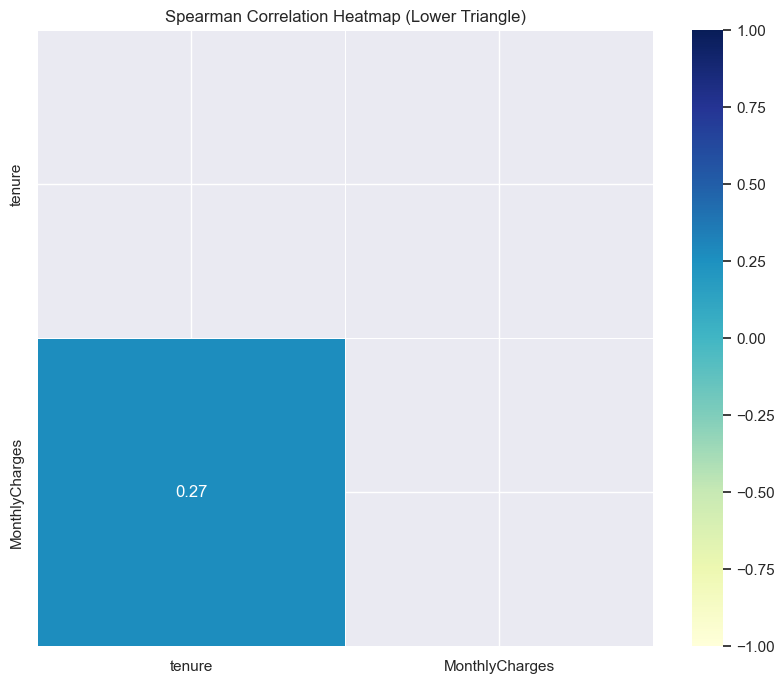

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Compute Spearman correlation matrix for numeric columns
corr = df.corr(numeric_only=True, method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap with the mask applied to show only the lower triangle
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Spearman Correlation Heatmap (Lower Triangle)')
plt.show()


#### **2.6.6 Correlation Analysis**

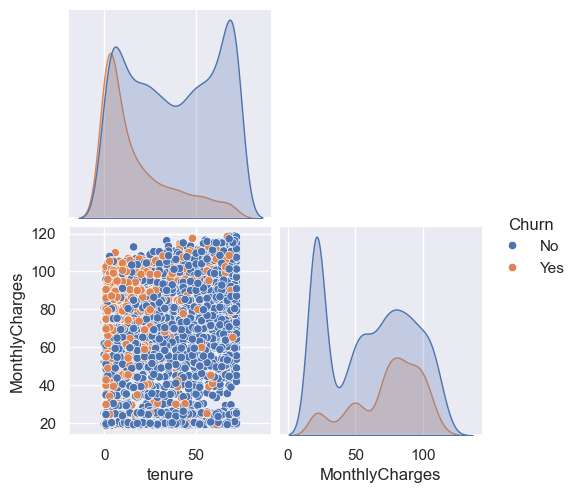

In [67]:
sns.pairplot(df, hue='Churn', corner=True);

#### **2.6.7 Statistics Summary**

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


In [69]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


- Tenure ranges from 0 to 72 months.
- MonthlyCharges vary widely, indicating different service usage.
- Churn rate can be calculated from the 'Churn' column (proportion of 'Yes').

## **Section 3. Data Preparation**

### **3.1 Feature Engineering**

In [70]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### **3.2 Target Labelling**

In [71]:
# Churn target labeling
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

### **3.3 Define X and y**

In [72]:
# Define features and target variable.
X = df.drop(columns=['Churn']) 
y = df['Churn']

### **3.4 Train Test Split**

In [73]:
# Train Test Split (stratify = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **3.5 Data Transformation**

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Identify categorical columns (excluding target 'Churn')
categorical_cols = [col for col in df.select_dtypes(include=['category']).columns if col != 'Churn']

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify binary columns to map 'No' -> 0 and 'Yes' -> 1
binary = unique_df[unique_df['unique'] == 2].index.tolist()
binary = [col for col in binary if col not in ['Churn', 'gender']]

# Separate categorical columns into binary and non-binary (excluding gender)
categorical_cols_no_binary = [col for col in categorical_cols if col not in binary + ['gender']]

# Function to map 'No' to 0 and 'Yes' to 1 in binary columns
def map_binary_yes_no(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=binary)
    for col in X.columns:
        X[col] = X[col].map({'No': 0, 'Yes': 1}).astype(np.int64)
    return X.values

# Function to map gender: 'Female' -> 0, 'Male' -> 1
# def map_gender(X):
#     import pandas as pd
#     if not isinstance(X, pd.DataFrame):
#         X = pd.DataFrame(X, columns=['gender'])
#     X['gender'] = X['gender'].map({'Female': 0, 'Male': 1}).astype(np.int64)
#     return X.values

# Pipeline for numeric columns: imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', RobustScaler())
])

# Pipeline for binary columns: map Yes/No to 0/1
binary_transformer = Pipeline(steps=[
    ('map_yes_no', FunctionTransformer(map_binary_yes_no))
])

# Pipeline for gender column: map Female/Male to 0/1
# gender_transformer = Pipeline(steps=[
#     ('map_gender', FunctionTransformer(map_gender))
# ])

# Pipeline for other categorical columns: one-hot encoding
categorical_transformer = Pipeline(steps=[
    # Uncomment if you want to impute missing categorical values with most frequent
    # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine all transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('binary', binary_transformer, binary),
        # ('gender', gender_transformer, ['gender']),
        ('cat', categorical_transformer, categorical_cols_no_binary)
    ],
    remainder='passthrough'  # pass through other columns like customerID and target
)


## **Section 4. Modeling**

### **4.1 Initialization**

- Initialize model pipeline and evaluation metrics.
- Define custom metrics if needed.
- Create a workflow of the experiment ?

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, fbeta_score

### **4.2 Developing the Model Pipeline**

- Build machine learning pipeline including preprocessing and model.

In [ ]:
# Optimized models dictionary with n_jobs where supported
models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, thread_count=-1)
}

# Use only recall scoring
scoring = ['recall']

# Map scoring names to scoring functions or strings
scoring_dict = {
    'recall': recall_scorer
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

list_scores = []

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    for score in scoring:
        scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=scoring_dict[score], n_jobs=-1)
        list_scores.append({
            'Model': model_name,
            'Metric': score,
            'Mean Score': np.mean(scores),
            'Std Dev': np.std(scores)
        })

### **4.3 Model Benchmarking (Comparing model base performance)**

- Evaluate multiple algorithms (e.g., Logistic Regression, Random Forest, XGBoost).

In [77]:
results_df = pd.DataFrame(list_scores)
results_df = results_df.sort_values(by=['Mean Score', 'Std Dev'], ascending=False)
results_df[results_df['Metric'] == 'recall']

,Model,Metric,Mean Score,Std Dev
0,Logistic Regression,recall,0.525173,0.027842
9,LightGBM,recall,0.525114,0.029516
8,XGBoost,recall,0.520339,0.035472
10,CatBoost,recall,0.516570,0.026279
3,Gradient Boosting,recall,0.510882,0.030015
1,Decision Tree,recall,0.483331,0.047352
7,k-NN,recall,0.479576,0.019245
2,Random Forest,recall,0.460546,0.026453
4,AdaBoost,recall,0.459598,0.026565
6,SVM,recall,0.447285,0.016270


### **4.4 VIF Analysis**

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# After preprocessing, create a DataFrame of numeric features for VIF calculation
# Apply the preprocessing pipeline to the training data (without the classifier)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Convert to DataFrame for easier handling
# Get feature names after preprocessing
def get_feature_names(preprocessor):
    feature_names = []

    # Numeric columns
    feature_names.extend(numeric_cols)

    # Binary columns (mapped to 0/1)
    feature_names.extend(binary)

    # Gender column mapped to 0/1
    # feature_names.append('gender')

    # One-hot encoded categorical columns
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(categorical_cols_no_binary)
    feature_names.extend(cat_features)

    return feature_names

feature_names = get_feature_names(preprocessor)

# Create DataFrame
X_vif = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)


c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,OnlineSecurity_No internet service,inf
6,OnlineBackup_No internet service,inf
9,InternetService_No,inf
10,DeviceProtection_No internet service,inf
12,TechSupport_No internet service,inf
1,MonthlyCharges,6.127736
8,InternetService_Fiber optic,3.874195
15,Contract_Two year,3.101295
3,PaperlessBilling,2.500183
0,tenure,2.282481


### **4.5 Tune Model**

- Remove VIF Variables
- Resampling using SMOTE/ADASYN/etc. (Using ImbLearn)
- Hyperparameter tuning using grid search or randomized search.

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform
import warnings
from sklearn.metrics import classification_report
from statsmodels.tools.sm_exceptions import ConvergenceWarning as SmConvergenceWarning
from sklearn.exceptions import ConvergenceWarning as SklearnConvergenceWarning

# Custom transformer to drop features with high VIF
class VIFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        self.threshold = threshold
        self.features_to_drop_ = []
        self.feature_names_ = None

    def fit(self, X, y=None):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X_df = pd.DataFrame(X, columns=self.feature_names_)

        vif_data = pd.DataFrame()
        vif_data['feature'] = X_df.columns
        vif_vals = []
        for i in range(X_df.shape[1]):
            try:
                vif = variance_inflation_factor(X_df.values, i)
            except Exception:
                vif = np.inf
            vif_vals.append(vif)
        vif_data['VIF'] = vif_vals

        self.features_to_drop_ = vif_data[(vif_data['VIF'] == np.inf) | (vif_data['VIF'] > self.threshold)]['feature'].tolist()
        return self

    def transform(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X_df = pd.DataFrame(X, columns=self.feature_names_)
        X_reduced = X_df.drop(columns=self.features_to_drop_, errors='ignore')
        return X_reduced.values

    def set_feature_names(self, feature_names):
        self.feature_names_ = feature_names
        return self

# Prepare feature names function (same as before)
def get_feature_names(preprocessor):
    feature_names = []
    feature_names.extend(numeric_cols)
    feature_names.extend(binary)
    # feature_names.append('gender')
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(categorical_cols_no_binary)
    feature_names.extend(cat_features)
    return feature_names

feature_names = get_feature_names(preprocessor)

# Instantiate VIFSelector and set feature names
vif_selector = VIFSelector(threshold=50).set_feature_names(feature_names)

# Define Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

# Define resamplers dictionary
resamplers = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter distribution
param_dist = {
    # 'classifier__C': uniform(0.01, 10),
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__l1_ratio': uniform(0, 1)
}

for name, sampler in resamplers.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('vif_selector', vif_selector),
        ('resampler', sampler),
        ('classifier', logreg)
    ])

    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=50,
        scoring='recall',
        cv=cv,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        refit=True
    )

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SmConvergenceWarning)
    warnings.simplefilter("ignore", category=SklearnConvergenceWarning)
    warnings.simplefilter("ignore")
    random_search.fit(X_train, y_train)


    print(f"Best recall score with {name}: {random_search.best_score_}")
    print(f"Best parameters with {name}: {random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best recall score with ADASYN: 0.8195666892349356
Best parameters with ADASYN: {'classifier__l1_ratio': 0.3745401188473625, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [87]:
# Evaluate on test set
from sklearn.metrics import classification_report

y_pred = random_search.predict(X_test)
print(f"Classification report for {name} on test set:")
print(classification_report(y_test, y_pred))

Classification report for ADASYN on test set:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       723
           1       0.51      0.83      0.63       263

    accuracy                           0.74       986
   macro avg       0.71      0.77      0.71       986
weighted avg       0.81      0.74      0.75       986



### **4.6 Analyze Model**

- Evaluate model on test data.
- Residual analysis and learning curves.
- Learning Curve Inspection ?

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       723
           1       0.51      0.83      0.63       263

    accuracy                           0.74       986
   macro avg       0.71      0.77      0.71       986
weighted avg       0.81      0.74      0.75       986

ROC-AUC Score: 0.8526


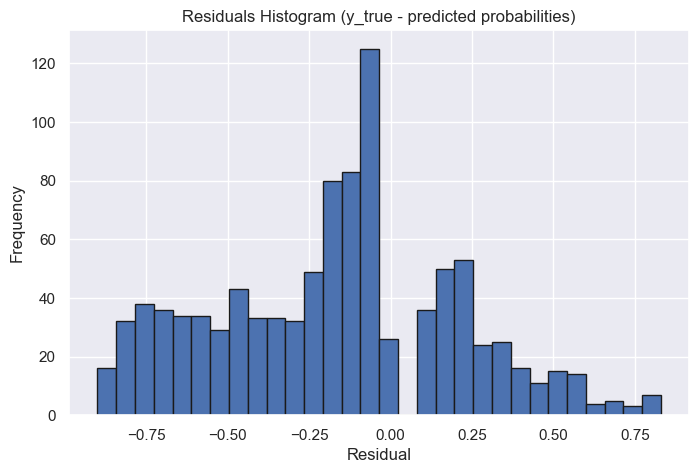

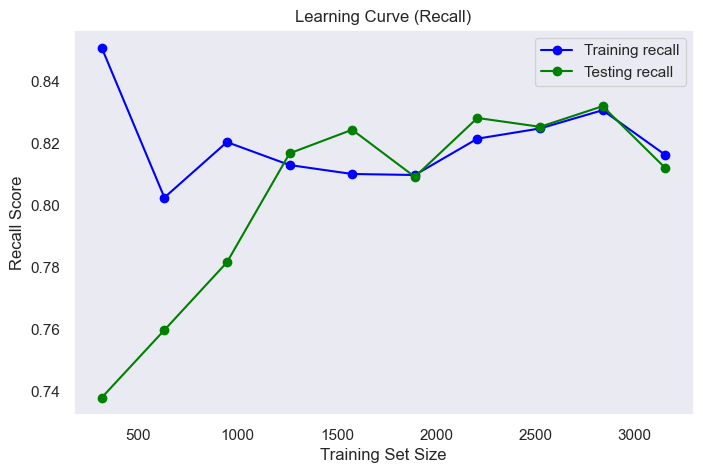

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, brier_score_loss, precision_recall_curve, RocCurveDisplay
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import learning_curve

# --- 4.6 Analyze Model ---

best_pipeline = random_search.best_estimator_

# Predict on test data
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Residual analysis: plot histogram of residuals (y_test - predicted probabilities)
residuals = y_test.astype(float) - y_proba
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Histogram (y_true - predicted probabilities)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline, X_train, y_train,
    cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training recall')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Testing recall')
plt.title('Learning Curve (Recall)')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid()
plt.show()

### **4.7 Model Calibration (Classification Only)**

- Calibrate probabilities for better decision thresholding.

c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warni

Brier score before calibration: 0.1697
Brier score after calibration: 0.1353


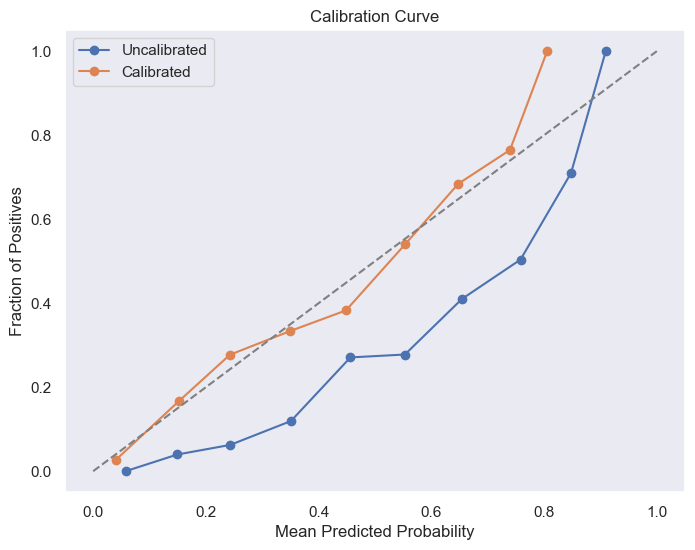

In [89]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning as SmConvergenceWarning

# Suppress specific warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)  # suppress divide by zero warnings
    warnings.simplefilter("ignore", category=SmConvergenceWarning)  # suppress statsmodels convergence warnings
    warnings.simplefilter("ignore", category=FutureWarning)  # suppress future warnings from Python and sklearn

    # Your calibration and evaluation code here
    calibrated_pipeline = CalibratedClassifierCV(best_pipeline, method='sigmoid', cv=5)
    calibrated_pipeline.fit(X_train, y_train)

    y_proba_calibrated = calibrated_pipeline.predict_proba(X_test)[:, 1]

    from sklearn.metrics import brier_score_loss
    y_proba_uncalibrated = best_pipeline.predict_proba(X_test)[:, 1]
    brier_before = brier_score_loss(y_test, y_proba_uncalibrated)
    brier_after = brier_score_loss(y_test, y_proba_calibrated)

    print(f"Brier score before calibration: {brier_before:.4f}")
    print(f"Brier score after calibration: {brier_after:.4f}")

    from sklearn.calibration import calibration_curve
    import matplotlib.pyplot as plt

    prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, y_proba_uncalibrated, n_bins=10)
    prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred_uncal, prob_true_uncal, marker='o', label='Uncalibrated')
    plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Calibrated')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Calibration Curve')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend()
    plt.grid()
    plt.show()

### **4.8 Model Explanation and Interpretation**

- Feature importance via tree-based models.
- SHAP value analysis.
- Counterfactual analysis for churn prediction.

In [91]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1. Transform the training data with the pipeline (preprocessor + VIF selector)
# Fit preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Function to get feature names after preprocessing
def get_feature_names(preprocessor):
    feature_names = []
    feature_names.extend(numeric_cols)
    feature_names.extend(binary)
    # feature_names.append('gender')
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(categorical_cols_no_binary)
    feature_names.extend(cat_features)
    return feature_names

feature_names = get_feature_names(preprocessor)

# Convert preprocessed data to DataFrame with feature names
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Apply VIFSelector transform to remove multicollinear features
vif_selector = VIFSelector(threshold=50).set_feature_names(feature_names)
vif_selector.fit(X_train_df)
X_train_reduced = vif_selector.transform(X_train_df)

# Get final feature names after removing high VIF features
features_after_vif = [f for f in feature_names if f not in vif_selector.features_to_drop_]

# Create DataFrame for final features
X_train_final = pd.DataFrame(X_train_reduced, columns=features_after_vif)

# --- IMPORTANT: Align indices of features and target ---
# Option 1: Reset indices of both
X_train_final = X_train_final.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# 2. Add intercept column for statsmodels
X_train_final = sm.add_constant(X_train_final)

# 3. Fit logistic regression using statsmodels (unregularized for interpretation)
model_sm = sm.Logit(y_train_reset, X_train_final)
result = model_sm.fit(disp=False)

# 4. Print summary
result.summary()

c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3944
Model:                          Logit   Df Residuals:                     3932
Method:                           MLE   Df Model:                           11
Date:                Wed, 14 May 2025   Pseudo R-squ.:                  0.2681
Time:                        15:40:12   Log-Likelihood:                -1674.9
converged:                       True   LL-Null:                       -2288.5
Covariance Type:            nonrobust   LLR p-value:                2.381e-256
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6364      0.184     -3.453      0.001      -0.998      -0.275
tenure                         -1.5033      0.134    -11.260      0.000      -1.765      -1.242
MonthlyCharges                  1.4599      0.218      6.711      0.000       1.034       1.886
Dependents                     -0.3156      0.106     -2.983      0.003      -0.523      -0.108
PaperlessBilling                0.4445      0.098      4.551      0.000       0.253       0.636
OnlineSecurity_Yes             -0.5333      0.115     -4.643      0.000      -0.758      -0.308
OnlineBackup_Yes               -0.2614      0.106     -2.471      0.013      -0.469      -0.054
InternetService_Fiber optic     0.1328      0.190      0.700      0.484      -0.239       0.505
DeviceProtection_Yes           -0.0237      0.111     -0.213      0.832      -0.242       0.194
TechSupport_Yes                -0.4456      0.119     -3.737      0.000      -0.679      -0.212
Contract_One year              -0.9661      0.141     -6.841      0.000      -1.243      -0.689
Contract_Two year              -1.3997      0.217     -6.452      0.000      -1.825      -0.975
===============================================================================================
"""

c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


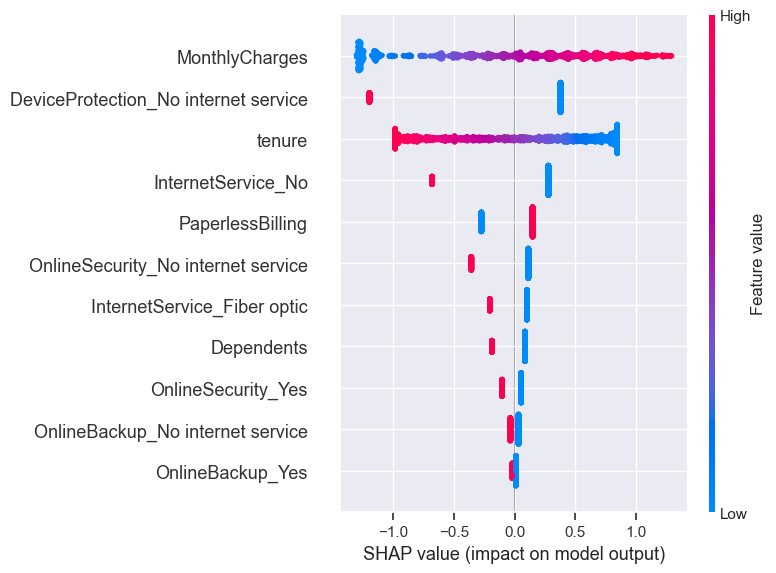

In [92]:
import shap
import pandas as pd

# Extract best pipeline
best_pipeline = random_search.best_estimator_

# Preprocessor + VIF selector pipeline
preprocessor_vif = ImbPipeline([
    ('preprocessor', best_pipeline.named_steps['preprocessor']),
    ('vif_selector', best_pipeline.named_steps['vif_selector'])
])

# Transform test data
X_test_preprocessed = preprocessor_vif.transform(X_test)

# Get feature names after preprocessing and VIF filtering
feature_names = get_feature_names(best_pipeline.named_steps['preprocessor'])
features_after_vif = [f for f in feature_names if f not in best_pipeline.named_steps['vif_selector'].features_to_drop_]

# Get classifier
model = best_pipeline.named_steps['classifier']

# Create SHAP explainer and values
explainer = shap.LinearExplainer(model, X_test_preprocessed, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_preprocessed)

# SHAP summary plot
shap.summary_plot(shap_values, features=X_test_preprocessed, feature_names=features_after_vif)


## **Section 8. Model Deployment**

- Outline deployment strategy for real-time or batch predictions.

## **Section 9. Model Implementation**

### **9.1 How to implement the model ?**


- Integrate model into business systems for churn prediction.
- Use API or batch jobs for scoring customers.

### **9.2 What are the limitations of the model ?**

- Model depends on data quality and feature relevance.
- Changes in customer behavior or services may reduce model accuracy over time.

### **9.3 Business Calculation (Simulation using unseen data)**

- Simulate retention interventions based on model predictions.

## **Section 10. Conclusion and Recommendation**

### **10.1 Conclusion**

- Model: The developed model predicts churn with good accuracy and provides insights into key factors.
- Business: Understanding churn drivers enables targeted retention strategies.

### **10.2 Recommendation**

- Model: Regularly update and monitor model performance.
- Business: Use model insights to improve customer service, contract offerings, and billing options to reduce churn.

## **References**